In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
from fancyimpute import KNN

C:\Users\Surya\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv("loan.csv")

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

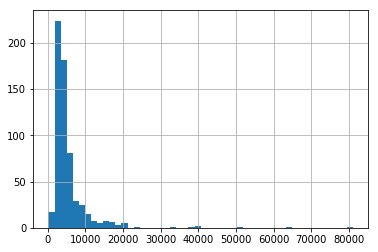

In [6]:
df['ApplicantIncome'].hist(bins=50)

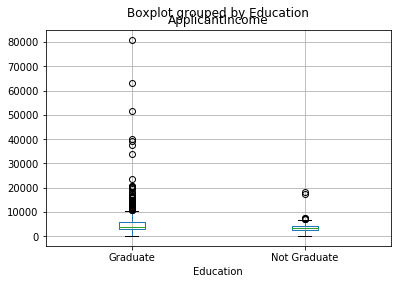

In [7]:
df.boxplot(column='ApplicantIncome',by='Education')

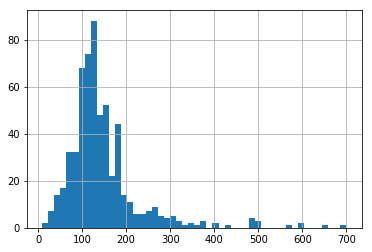

In [8]:
df['LoanAmount'].hist(bins=50)

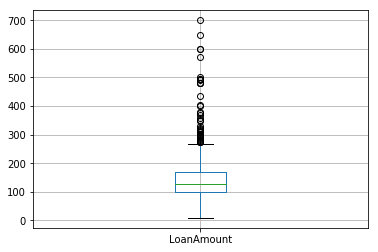

In [9]:
df.boxplot(column='LoanAmount')

In [10]:
print(df['Credit_History'].value_counts(ascending=True))

0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [11]:
temp=df.pivot_table(values='Loan_Status',index='Credit_History',aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print(temp)

                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [12]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
df['Self_Employed'].fillna('No',inplace=True)

In [15]:
lis=[]
for i in range(0,df.shape[1]):
    if(df.iloc[:,i].dtype=='object'):
        df.iloc[:,i]=pd.Categorical(df.iloc[:,i])
        df.iloc[:,i]=df.iloc[:,i].cat.codes
        df.iloc[:,i]=df.iloc[:,i].astype('object')
        lis.append(df.columns[i])

In [16]:
df=pd.DataFrame(KNN(k=3).complete(df),columns=df.columns)

Imputing row 1/614 with 1 missing, elapsed time: 0.262
Imputing row 101/614 with 0 missing, elapsed time: 0.264
Imputing row 201/614 with 0 missing, elapsed time: 0.266
Imputing row 301/614 with 0 missing, elapsed time: 0.268
Imputing row 401/614 with 0 missing, elapsed time: 0.269
Imputing row 501/614 with 0 missing, elapsed time: 0.271
Imputing row 601/614 with 1 missing, elapsed time: 0.273


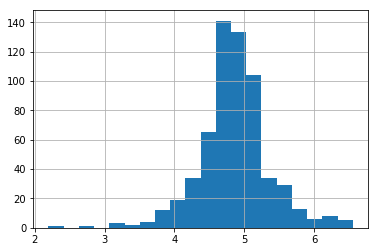

In [17]:
df['Loan_Amount_Log']=np.log(df['LoanAmount'])
df['Loan_Amount_Log'].hist(bins=20)

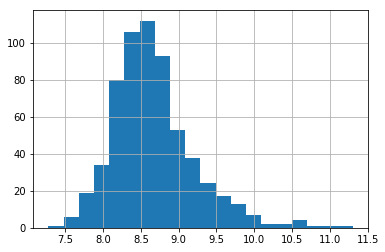

In [18]:
df['Total_Amount_Log']=np.log(df['CoapplicantIncome']+df['ApplicantIncome'])
df['Total_Amount_Log'].hist(bins=20)

In [19]:
from sklearn.linear_model import LogisticRegression
outcome='Loan_Status'
model=LogisticRegression()
predictor=['Credit_History','Education','Self_Employed','Property_Area']

model.fit(df[predictor],df[outcome])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
prediction=model.predict(df[predictor])

In [21]:
from sklearn import metrics
accuracy=metrics.accuracy_score(prediction,df[outcome])
print("%s" % "{0:.3%}".format(accuracy))

80.619%


In [22]:
from sklearn.cross_validation import KFold
error=[]
kf=KFold(df.shape[0],n_folds=5)
for train,test in kf:
    train_pred=df[predictor].iloc[train,:]
    train_target=df[outcome].iloc[train]
    model.fit(train_pred,train_target)
    error.append(model.score(df[predictor].iloc[test,:],df[outcome].iloc[test]))
print("%s"%"{0:0.3%}".format(np.mean(error)))
    

80.621%


C:\Users\Surya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
from sklearn.tree import DecisionTreeClassifier
predictor_t=['Married','Education','Credit_History','Total_Amount_Log']
outcome_t=['Loan_Status']
model_t=DecisionTreeClassifier()
model_t.fit(df[predictor_t],df[outcome_t])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
prediction_t=model_t.predict(df[predictor_t])

In [25]:
accuracy_t=metrics.accuracy_score(prediction_t,df[outcome_t])

In [26]:
print("%s" %"{0:.3%}".format(accuracy_t))

98.860%


In [27]:
kf_t=KFold(df.shape[0],n_folds=5)
error_t=[]
for train_t,test_t in kf_t:
    train_pred_t=df[predictor_t].iloc[train_t,:]
    train_target_t=df[outcome_t].iloc[train_t]
    model_t.fit(train_pred_t,train_target_t)
    error_t.append(model_t.score(df[predictor_t].iloc[test_t,:],df[outcome_t].iloc[test_t]))
print("%s"%"{0:.3%}".format(np.mean(error_t)))

69.220%


In [28]:
from sklearn.ensemble import RandomForestClassifier
predictor_r=['Education','Married','Credit_History','Total_Amount_Log']
outcome_r=['Loan_Status']
model_r=RandomForestClassifier(n_estimators=100)
model_r.fit(df[predictor_r],df[outcome])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
prediction_r=model_r.predict(df[predictor_r])

In [30]:
accuracy_r=metrics.accuracy_score(prediction_r,df[outcome])

In [31]:
print("%s"%"{0:.3%}".format(accuracy_r))

97.394%


In [32]:
kf_r=KFold(df.shape[0],n_folds=5)
error_r=[]
for train_r,test_r in kf_r:
    train_pred_r=df[predictor_r].iloc[train_r,:]
    train_target_r=df[outcome_r].iloc[train_r]
    model_r.fit(train_pred_r,train_target_r)
    error_r.append(model_r.score(df[predictor_r].iloc[test_r,:],df[outcome_r].iloc[test_r]))
print("%s"%"{0:.3%}".format(np.mean(error_r)))

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A col

70.848%
